In [26]:
import pandas as pd
import numpy as np
import geopandas as gpd
import re
import seaborn as sns
import matplotlib.pyplot as plt



In [88]:
appearances_df = pd.read_csv('/Users/marvel/Downloads/Assignment Data 2023-2024/appearances.csv')
games_df = pd.read_csv('/Users/marvel/Downloads/Assignment Data 2023-2024/games.csv')
club_games_df = pd.read_csv('/Users/marvel/Downloads/Assignment Data 2023-2024/club_games.csv')
game_events_df = pd.read_csv('/Users/marvel/Downloads/Assignment Data 2023-2024/game_events.csv')
clubs_df = pd.read_csv('/Users/marvel/Downloads/Assignment Data 2023-2024/clubs.csv')
competition_df = pd.read_csv('/Users/marvel/Downloads/Assignment Data 2023-2024/competitions.csv')
game_lineups_df = pd.read_csv('/Users/marvel/Downloads/Assignment Data 2023-2024/game_lineups.csv')
player_valuations_df = pd.read_csv('/Users/marvel/Downloads/Assignment Data 2023-2024/player_valuations.csv')
players_df = pd.read_csv('/Users/marvel/Downloads/Assignment Data 2023-2024/players.csv')
country_shapes = gpd.read_file('/Users/marvel/Downloads/country_shapes.geojson')



In [23]:
print(appearances_df.head())
print(club_games_df.head())
print(game_events_df.head())
print(clubs_df.head())
print(competition_df.head())
print(game_lineups_df.head())
print(player_valuations_df.head())
print(players_df.head())
print(games_df.head())


    appearance_id  game_id  player_id  player_club_id  player_current_club_id  \
0   2231978_38004  2231978      38004             853                     235   
1   2233748_79232  2233748      79232            8841                    2698   
2   2234413_42792  2234413      42792            6251                     465   
3   2234418_73333  2234418      73333            1274                    6646   
4  2234421_122011  2234421     122011             195                    3008   

         date       player_name competition_id  yellow_cards  red_cards  \
0  2012-07-03  Aurélien Joachim            CLQ             0          0   
1  2012-07-05    Ruslan Abyshov            ELQ             0          0   
2  2012-07-05       Sander Puri            ELQ             0          0   
3  2012-07-05   Vegar Hedenstad            ELQ             0          0   
4  2012-07-05  Markus Henriksen            ELQ             0          0   

   goals  assists  minutes_played  
0      2        0         

# Cleaning for Appearances Table

In [5]:
print("Missing data in Appearances table:")
print(appearances_df.isnull().sum())

appearances_df['yellow_cards'] = appearances_df['yellow_cards'].fillna(0)
appearances_df['red_cards'] = appearances_df['red_cards'].fillna(0)
appearances_df['goals'] = appearances_df['goals'].fillna(0)
appearances_df['assists'] = appearances_df['assists'].fillna(0)
appearances_df['minutes_played'] = appearances_df['minutes_played'].fillna(0)

appearances_df = appearances_df.dropna(subset=['player_name'])

print("After cleaning:")
print(appearances_df.isnull().sum())


Missing data in Appearances table:
appearance_id               0
game_id                     0
player_id                   0
player_club_id              0
player_current_club_id      0
date                        0
player_name               324
competition_id              0
yellow_cards                0
red_cards                   0
goals                       0
assists                     0
minutes_played              0
dtype: int64
After cleaning:
appearance_id             0
game_id                   0
player_id                 0
player_club_id            0
player_current_club_id    0
date                      0
player_name               0
competition_id            0
yellow_cards              0
red_cards                 0
goals                     0
assists                   0
minutes_played            0
dtype: int64


# Cleaning for the Games table

In [28]:
#Function for making sure the formation has no names in it 
def clean_formation_name(formation):
    return re.sub(r'[^0-9-]', '', formation).strip()


In [40]:
print("Missing data in Games table:")
print(games_df.isnull().sum())

games_df['home_club_goals'] = games_df['home_club_goals'].fillna(0)
games_df['away_club_goals'] = games_df['away_club_goals'].fillna(0)
games_df['home_club_position'] = games_df['home_club_position'].fillna('Unknown')
games_df['away_club_position'] = games_df['away_club_position'].fillna('Unknown')
games_df['home_club_manager_name'] = games_df['home_club_manager_name'].fillna('Unknown')
games_df['away_club_manager_name'] = games_df['away_club_manager_name'].fillna('Unknown')
games_df['stadium'] = games_df['stadium'].fillna('Unknown')
games_df['attendance'] = games_df['attendance'].fillna(0)

#converting the formation to string
games_df['home_club_formation'] = games_df['home_club_formation'].astype(str)
games_df['away_club_formation'] = games_df['away_club_formation'].astype(str)


#  cleaning function to the formation columns
games_df['home_club_formation'] = games_df['home_club_formation'].apply(clean_formation_name)
games_df['away_club_formation'] = games_df['away_club_formation'].apply(clean_formation_name)

games_df['home_club_formation'].fillna('', inplace=True)
games_df['away_club_formation'].fillna('', inplace=True)

print("After cleaning:")
print(games_df.isnull().sum())


Missing data in Games table:
game_id                       0
competition_id                0
season                        0
round                         0
date                          0
home_club_id                  0
away_club_id                  0
home_club_goals               0
away_club_goals               0
home_club_position            0
away_club_position            0
home_club_manager_name        0
away_club_manager_name        0
stadium                       0
attendance                    0
referee                     594
url                           0
home_club_formation           0
away_club_formation           0
home_club_name            11252
away_club_name            10049
aggregate                     0
competition_type              0
dtype: int64
After cleaning:
game_id                       0
competition_id                0
season                        0
round                         0
date                          0
home_club_id                  0
away_club_id  

# Cleaning for the club games table

In [11]:
print("Missing data in Club Games table:")
print(club_games_df.isnull().sum())

club_games_df['own_goals'] = club_games_df['own_goals'].fillna(0)
club_games_df['opponent_goals'] = club_games_df['opponent_goals'].fillna(0)
club_games_df['own_position'] = club_games_df['own_position'].fillna('Unknown')
club_games_df['opponent_position'] = club_games_df['opponent_position'].fillna('Unknown')
club_games_df['own_manager_name'] = club_games_df['own_manager_name'].fillna('Unknown')
club_games_df['opponent_manager_name'] = club_games_df['opponent_manager_name'].fillna('Unknown')

print("After cleaning:")
print(club_games_df.isnull().sum())


Missing data in Club Games table:
game_id                      0
club_id                      0
own_goals                    0
own_position             38908
own_manager_name          1484
opponent_id                  0
opponent_goals               0
opponent_position        38908
opponent_manager_name     1484
hosting                      0
is_win                       0
dtype: int64
After cleaning:
game_id                  0
club_id                  0
own_goals                0
own_position             0
own_manager_name         0
opponent_id              0
opponent_goals           0
opponent_position        0
opponent_manager_name    0
hosting                  0
is_win                   0
dtype: int64


# Cleaning data for the Game Events table

In [12]:
print("Missing data in Game Events table:")
print(game_events_df.isnull().sum())

game_events_df['minute'] = game_events_df['minute'].fillna(0)
game_events_df['type'] = game_events_df['type'].fillna('Unknown')
game_events_df['description'] = game_events_df['description'].fillna('No description')
game_events_df['player_id'] = game_events_df['player_id'].fillna(0)
game_events_df['player_in_id'] = game_events_df['player_in_id'].fillna(0)
game_events_df['player_assist_id'] = game_events_df['player_assist_id'].fillna(0)

print("After cleaning:")
print(game_events_df.isnull().sum())


Missing data in Game Events table:
game_event_id            0
date                     0
game_id                  0
minute                   0
type                     0
club_id                  0
player_id                0
description         336325
player_in_id        245309
player_assist_id    635701
dtype: int64
After cleaning:
game_event_id       0
date                0
game_id             0
minute              0
type                0
club_id             0
player_id           0
description         0
player_in_id        0
player_assist_id    0
dtype: int64


# Cleaning data for the Clubs table

In [13]:
print("Missing data in Clubs table:")
print(clubs_df.isnull().sum())

clubs_df['total_market_value'] = clubs_df['total_market_value'].fillna(0)
clubs_df['squad_size'] = clubs_df['squad_size'].fillna(0)
clubs_df['average_age'] = clubs_df['average_age'].fillna(clubs_df['average_age'].mean())  # Fill with mean
clubs_df['foreigners_number'] = clubs_df['foreigners_number'].fillna(0)
clubs_df['foreigners_percentage'] = clubs_df['foreigners_percentage'].fillna(0)
clubs_df['national_team_players'] = clubs_df['national_team_players'].fillna(0)
clubs_df['stadium_name'] = clubs_df['stadium_name'].fillna('Unknown')
clubs_df['stadium_seats'] = clubs_df['stadium_seats'].fillna(0)
clubs_df['net_transfer_record'] = clubs_df['net_transfer_record'].fillna(0)
clubs_df['coach_name'] = clubs_df['coach_name'].fillna('Unknown')

print("After cleaning:")
print(clubs_df.isnull().sum())


Missing data in Clubs table:
club_id                      0
club_code                    0
name                         0
domestic_competition_id      0
total_market_value         426
squad_size                   0
average_age                 38
foreigners_number            0
foreigners_percentage       47
national_team_players        0
stadium_name                 0
stadium_seats                0
net_transfer_record          0
coach_name                 426
last_season                  0
url                          0
dtype: int64
After cleaning:
club_id                    0
club_code                  0
name                       0
domestic_competition_id    0
total_market_value         0
squad_size                 0
average_age                0
foreigners_number          0
foreigners_percentage      0
national_team_players      0
stadium_name               0
stadium_seats              0
net_transfer_record        0
coach_name                 0
last_season                0
url        

# Cleaning data for the Competition table

In [14]:
print("Missing data in Competition table:")
print(competition_df.isnull().sum())

competition_df['sub_type'] = competition_df['sub_type'].fillna('Unknown')
competition_df['domestic_league_code'] = competition_df['domestic_league_code'].fillna('Unknown')
competition_df['confederation'] = competition_df['confederation'].fillna('Unknown')

print("After cleaning:")
print(competition_df.isnull().sum())


Missing data in Competition table:
competition_id          0
competition_code        0
name                    0
sub_type                0
type                    0
country_id              0
country_name            7
domestic_league_code    7
confederation           0
url                     0
dtype: int64
After cleaning:
competition_id          0
competition_code        0
name                    0
sub_type                0
type                    0
country_id              0
country_name            7
domestic_league_code    0
confederation           0
url                     0
dtype: int64


# Cleaning Game Lineups Table

In [15]:
print("Missing data in Game Lineups table:")
print(game_lineups_df.isnull().sum())

game_lineups_df['number'] = game_lineups_df['number'].fillna(0)
game_lineups_df['player_name'] = game_lineups_df['player_name'].fillna('Unknown')
game_lineups_df['team_captain'] = game_lineups_df['team_captain'].fillna(False)
game_lineups_df['position'] = game_lineups_df['position'].fillna('Unknown')

print("After cleaning:")
print(game_lineups_df.isnull().sum())


Missing data in Game Lineups table:
game_lineups_id    0
game_id            0
club_id            0
type               0
number             0
player_id          0
player_name        0
team_captain       0
position           0
dtype: int64
After cleaning:
game_lineups_id    0
game_id            0
club_id            0
type               0
number             0
player_id          0
player_name        0
team_captain       0
position           0
dtype: int64


# Cleaning the Player Valuation table

In [16]:
print("Missing data in Player Valuations table:")
print(player_valuations_df.isnull().sum())

player_valuations_df['market_value_in_eur'] = player_valuations_df['market_value_in_eur'].fillna(0)
player_valuations_df['n'] = player_valuations_df['n'].fillna(0)
player_valuations_df['current_club_id'] = player_valuations_df['current_club_id'].fillna(0)

print("After cleaning:")
print(player_valuations_df.isnull().sum())


Missing data in Player Valuations table:
player_id                              0
last_season                            0
datetime                               0
date                                   0
dateweek                               0
market_value_in_eur                    0
n                                      0
current_club_id                        0
player_club_domestic_competition_id    0
dtype: int64
After cleaning:
player_id                              0
last_season                            0
datetime                               0
date                                   0
dateweek                               0
market_value_in_eur                    0
n                                      0
current_club_id                        0
player_club_domestic_competition_id    0
dtype: int64


# Cleaning the Players Table

In [18]:
print("Missing data in Players table:")
print(players_df.isnull().sum())

players_df['country_of_birth'] = players_df['country_of_birth'].fillna('Unknown')
players_df['city_of_birth'] = players_df['city_of_birth'].fillna('Unknown')
players_df['country_of_citizenship'] = players_df['country_of_citizenship'].fillna('Unknown')
players_df['sub_position'] = players_df['sub_position'].fillna('Unknown')
players_df['position'] = players_df['position'].fillna('Unknown')
players_df['foot'] = players_df['foot'].fillna('Unknown')
players_df['height_in_cm'] = players_df['height_in_cm'].fillna(players_df['height_in_cm'].mean())  
players_df['market_value_in_eur'] = players_df['market_value_in_eur'].fillna(0)
players_df['highest_market_value_in_eur'] = players_df['highest_market_value_in_eur'].fillna(0)
players_df['contract_expiration_date'] = players_df['contract_expiration_date'].fillna('Unknown')
players_df['agent_name'] = players_df['agent_name'].fillna('Unknown')
players_df['image_url'] = players_df['image_url'].fillna('Unknown')

print("After cleaning:")
print(players_df.isnull().sum())


Missing data in Players table:
player_id                                  0
first_name                              1965
last_name                                  0
name                                       0
last_season                                0
current_club_id                            0
player_code                                0
country_of_birth                           0
city_of_birth                              0
country_of_citizenship                     0
date_of_birth                             47
sub_position                               0
position                                   0
foot                                       0
height_in_cm                               0
market_value_in_eur                        0
highest_market_value_in_eur                0
contract_expiration_date                   0
agent_name                                 0
image_url                                  0
url                                        0
current_club_domestic_co

/var/folders/kw/59p16kwd47n058t_2lgcspn00000gn/T/ipykernel_3312/3622598752.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=formations_win_rate, y='formation', x='is_win', palette='viridis')


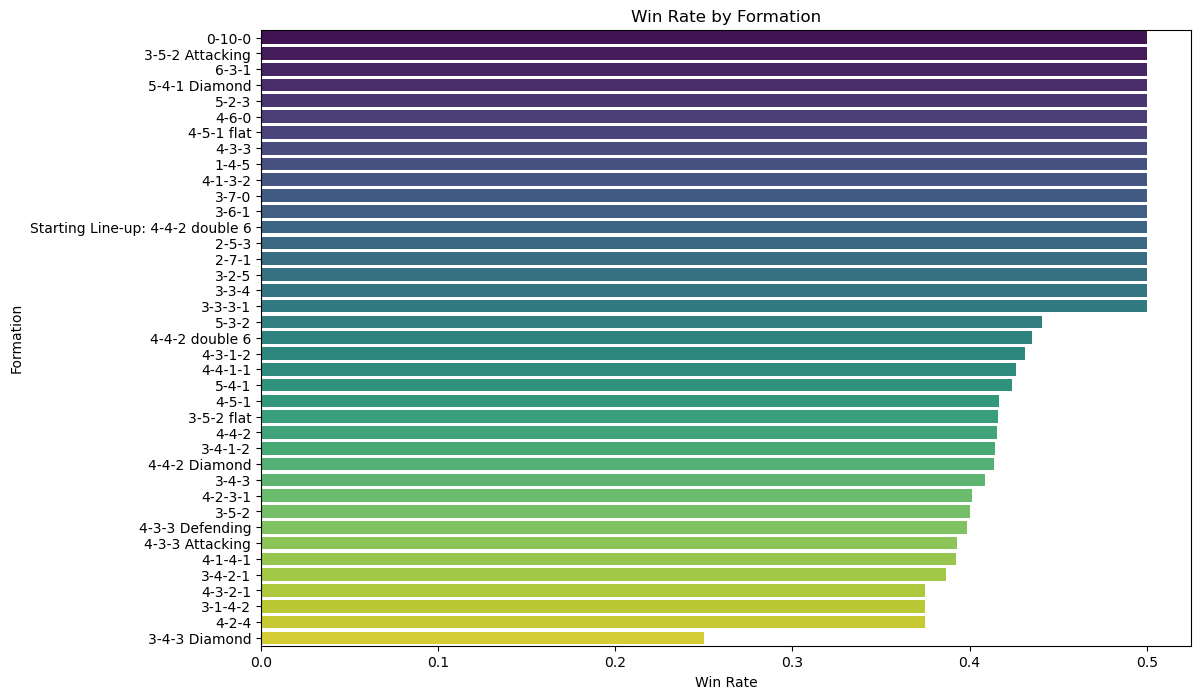

In [174]:
def plot_win_rate_by_formation(club_games_df, games_df):
    filtered_games_df = games_df[(games_df['home_club_formation'] != '') | (games_df['away_club_formation'] != '')]
    
    merged_df = club_games_df.merge(filtered_games_df[['game_id', 'home_club_formation', 'away_club_formation']], on='game_id', how='left')
    
    merged_df['formation'] = merged_df.apply(
        lambda row: row['home_club_formation'] if row['hosting'] == 1 else row['away_club_formation'], axis=1
    )
    
    formations_win_rate = merged_df.groupby('formation')['is_win'].mean().reset_index()
    formations_win_rate = formations_win_rate.sort_values(by='is_win', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(data=formations_win_rate, y='formation', x='is_win', palette='viridis')
    plt.title("Win Rate by Formation")
    plt.xlabel('Win Rate')
    plt.ylabel('Formation')
    plt.show()


plot_win_rate_by_formation(club_games_df, games_df)


# Most used formations 

/var/folders/kw/59p16kwd47n058t_2lgcspn00000gn/T/ipykernel_3312/2397074287.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_formations, x='Formation', y='Count', palette='viridis')


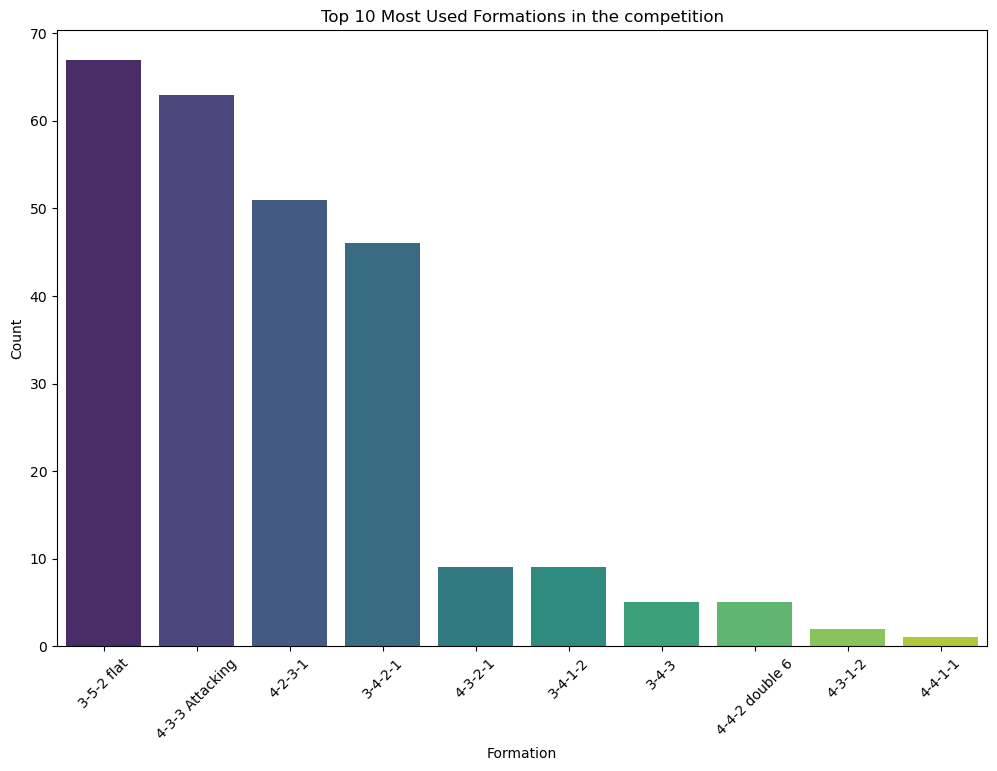

In [171]:
def plot_most_used_formations(games_df, competition_id=None, top_n=10):
    if competition_id:
        games_df = games_df[games_df['competition_id'] == competition_id]

    formations_df = games_df[(games_df['home_club_formation'].notna()) & (games_df['away_club_formation'].notna())]

    home_formations = formations_df['home_club_formation'].astype(str)
    away_formations = formations_df['away_club_formation'].astype(str)

    all_formations = pd.concat([home_formations, away_formations], axis=0)

    all_formations = all_formations[all_formations != 'nan']

    formations_count = all_formations.value_counts().reset_index()
    formations_count.columns = ['Formation', 'Count']

    # Select the top N formations
    top_formations = formations_count.head(top_n)

    # Plotting the top formations
    plt.figure(figsize=(12, 8))
    sns.barplot(data=top_formations, x='Formation', y='Count', palette='viridis')
    plt.title(f"Top {top_n} Most Used Formations in the competition")
    plt.xlabel('Formation')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


plot_most_used_formations(games_df, competition_id='IT1', top_n=10)


# Refrees that give the most Red-Cards

/var/folders/kw/59p16kwd47n058t_2lgcspn00000gn/T/ipykernel_3312/1871938999.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=red_card_referees, x='referee', y='red_cards', palette='viridis')


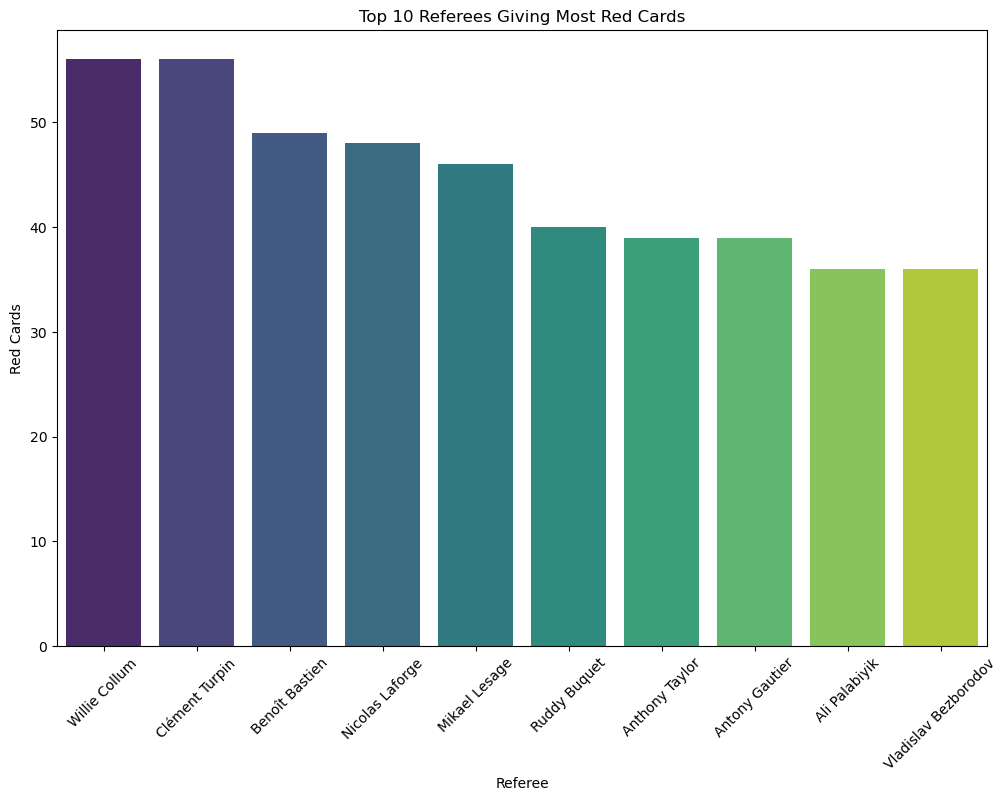

In [69]:
def plot_top_referees_red_cards(games_df, appearances_df):
    appearances_df['red_cards'] = pd.to_numeric(appearances_df['red_cards'], errors='coerce')
    
    merged_df = games_df.merge(appearances_df[['game_id', 'red_cards']], on='game_id', how='left')
    
    red_card_referees = merged_df.groupby('referee')['red_cards'].sum().reset_index()
    
    red_card_referees = red_card_referees.dropna().sort_values(by='red_cards', ascending=False).head(10)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(data=red_card_referees, x='referee', y='red_cards', palette='viridis')
    plt.title("Top 10 Referees Giving Most Red Cards")
    plt.xlabel('Referee')
    plt.ylabel('Red Cards')
    plt.xticks(rotation=45)
    plt.show()


plot_top_referees_red_cards(games_df, appearances_df)

# Average Club Market Value per country

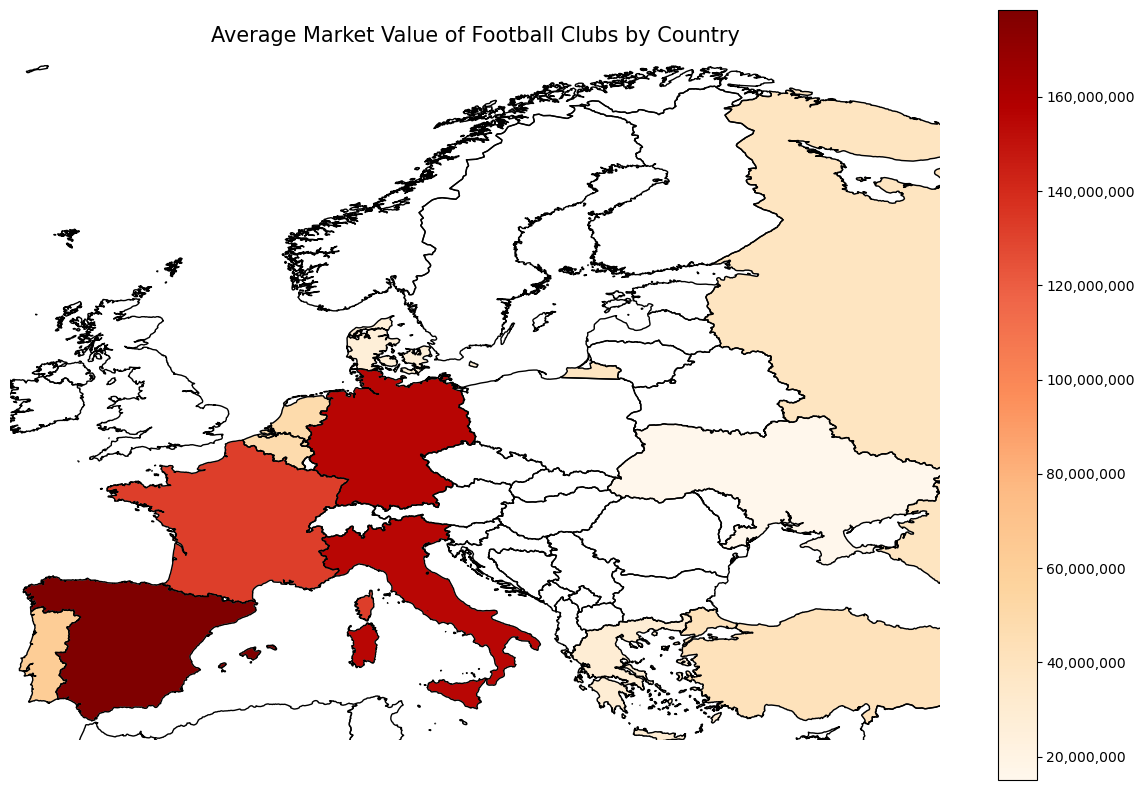

In [112]:
import matplotlib.ticker as mtick

def aggregate_player_market_value(players_df):
    """
    Aggregates the market value of players by their current club.
    """
    return players_df.groupby('current_club_id')['market_value_in_eur'].sum().reset_index()

def average_market_value_of_clubs_by_country(clubs_df, competition_df, players_df, country_shapes):
    club_market_values = aggregate_player_market_value(players_df)
    
    clubs_with_values = clubs_df.merge(club_market_values, 
                                       left_on='club_id', 
                                       right_on='current_club_id', 
                                       how='left')

    merged_clubs = clubs_with_values.merge(competition_df[['competition_id', 'country_name']], 
                                           left_on='domestic_competition_id', 
                                           right_on='competition_id', 
                                           how='left')

    merged_clubs['country_name'] = merged_clubs['country_name'].astype(str).str.lower().str.strip()
    country_shapes['ADMIN'] = country_shapes['ADMIN'].astype(str).str.lower().str.strip()

    merged_df = merged_clubs.merge(country_shapes[['ADMIN', 'geometry']], 
                                   left_on='country_name', 
                                   right_on='ADMIN', 
                                   how='left')

    avg_market_value = merged_df.groupby('country_name')['market_value_in_eur'].mean()

    return avg_market_value


def plot_average_market_value_by_country(avg_market_value, country_shapes, xlim=None, ylim=None):
    country_shapes['ADMIN'] = country_shapes['ADMIN'].astype(str).str.lower().str.strip()
    avg_market_value = avg_market_value.reset_index()
    avg_market_value['country_name'] = avg_market_value['country_name'].str.lower().str.strip()

    merged = country_shapes.merge(avg_market_value, 
                                  left_on='ADMIN', 
                                  right_on='country_name', 
                                  how='left')
    
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    country_shapes.boundary.plot(ax=ax, linewidth=1, color="black")  # Plot all country boundaries
    
    merged.plot(column='market_value_in_eur', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

    if xlim:
        ax.set_xlim(xlim)
    if ylim:
        ax.set_ylim(ylim)

    cbar = ax.get_figure().get_axes()[1] 
    cbar.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
    
    ax.set_title('Average Market Value of Football Clubs by Country', fontsize=15)
    ax.set_axis_off()
    plt.show()

avg_market_value = average_market_value_of_clubs_by_country(clubs_df, competition_df, players_df, country_shapes)

# Zooming in europe
plot_average_market_value_by_country(avg_market_value, country_shapes, xlim=[-10, 40], ylim=[35, 72])

# Average player age by country

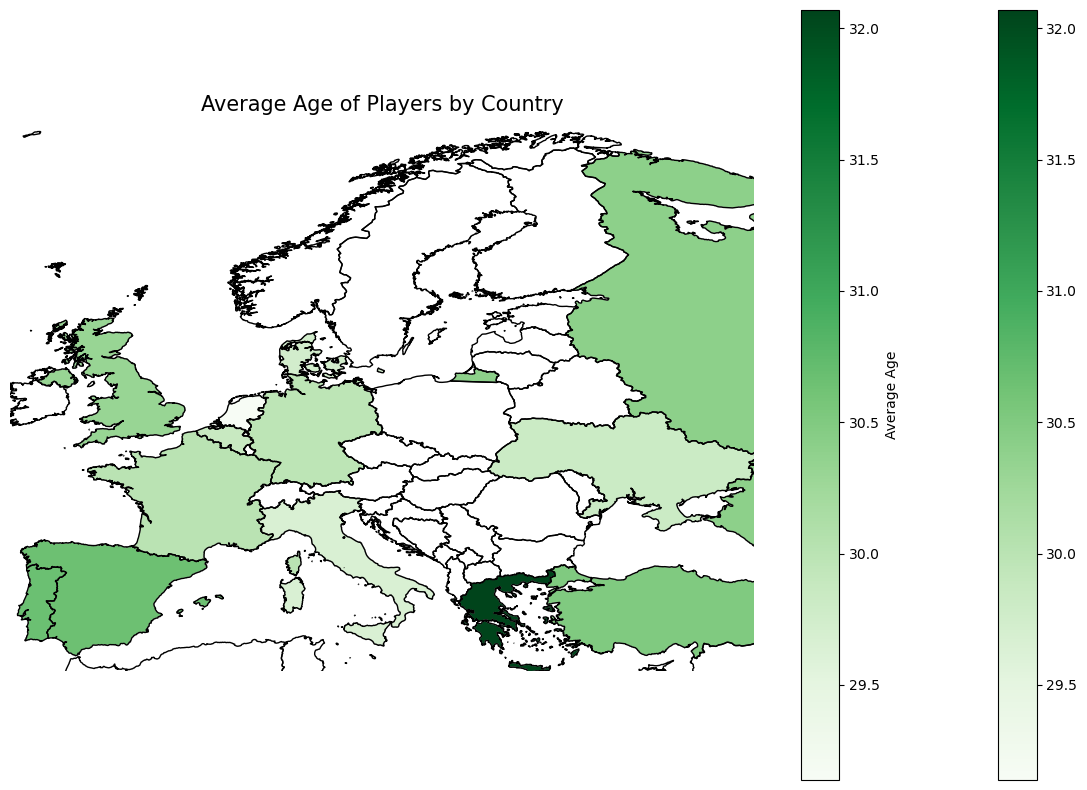

In [113]:
def average_age_by_country(players_df, clubs_df, competition_df, country_shapes):
    # Calculate age in years
    players_df['date_of_birth'] = pd.to_datetime(players_df['date_of_birth'])
    players_df['age'] = (pd.Timestamp.now() - players_df['date_of_birth']).dt.days / 365.25
    
    clubs_df = clubs_df[['club_id', 'domestic_competition_id']]
    competition_df = competition_df[['competition_id', 'country_name']]
    
    merged_df = players_df[['player_id', 'age', 'current_club_id']].merge(clubs_df, left_on='current_club_id', right_on='club_id', how='left')
    merged_df = merged_df.merge(competition_df, left_on='domestic_competition_id', right_on='competition_id', how='left')
    
    avg_age = merged_df.groupby('country_name')['age'].mean().reset_index()
    name_mapping = {
    'England': 'United Kingdom', 
    'Scotland': 'United Kingdom',
    'Wales': 'United Kingdom',
    'Northern Ireland': 'United Kingdom'
    }
    
    avg_age['country_name'] = avg_age['country_name'].replace(name_mapping)
    
    country_shapes['ADMIN'] = country_shapes['ADMIN'].astype(str).str.lower().str.strip()
    avg_age['country_name'] = avg_age['country_name'].str.lower().str.strip()
    merged = country_shapes.merge(avg_age, left_on='ADMIN', right_on='country_name', how='left')


    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    country_shapes.boundary.plot(ax=ax, linewidth=1, color="black")
    merged.plot(column='age', cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    
    sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=merged['age'].min(), vmax=merged['age'].max()))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label('Average Age')

    ax.set_title('Average Age of Players by Country', fontsize=15)

    # zooming over europe
    ax.set_xlim(-10, 40)  
    ax.set_ylim(35, 72)   

    ax.set_axis_off()
    plt.show()

average_age_by_country(players_df, clubs_df, competition_df, country_shapes)


# Total market value per country

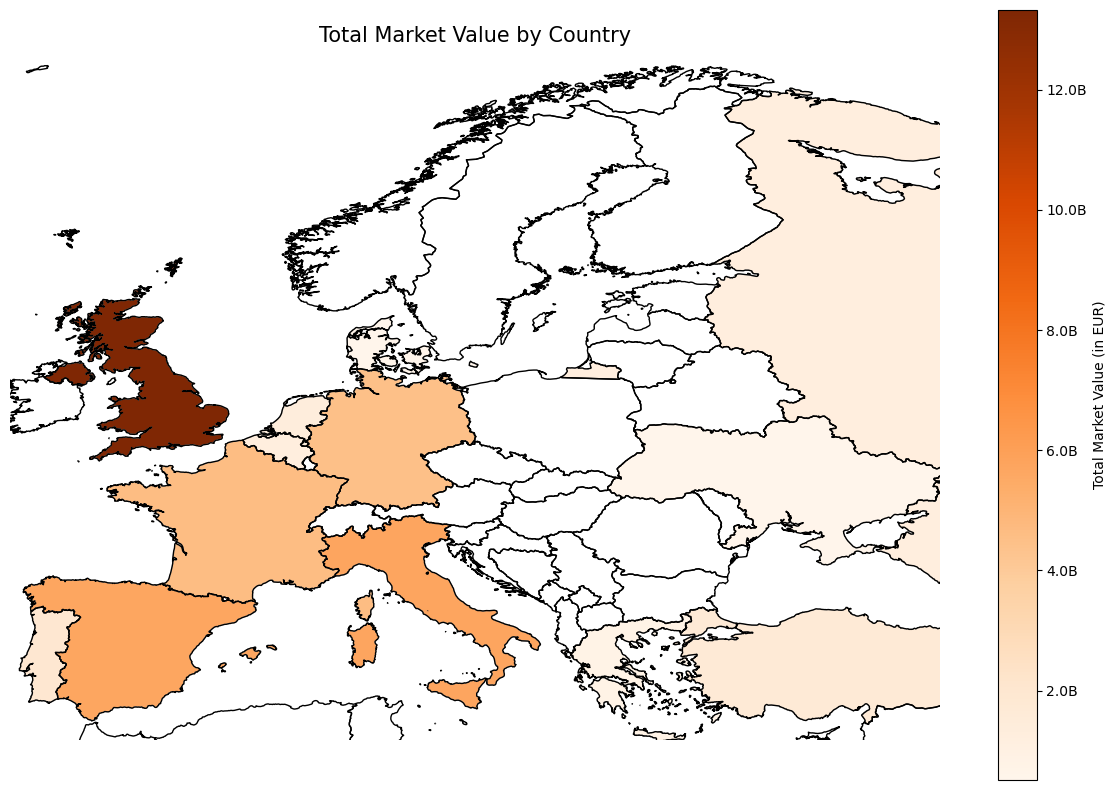

In [118]:
def format_large_numbers(x, _):
    if x >= 1e9:
        return f'{x/1e9:.1f}B'
    elif x >= 1e6:
        return f'{x/1e6:.1f}M'
    else:
        return f'{x:.0f}'
    
def total_market_value_by_country(players_df, clubs_df, competition_df, country_shapes):
    name_mapping = {
        'England': 'United Kingdom',
        'Scotland': 'United Kingdom',
        'Wales': 'United Kingdom',
        'Northern Ireland': 'United Kingdom'
    }

    players_df = players_df[['player_id', 'market_value_in_eur', 'current_club_id']]
    clubs_df = clubs_df[['club_id', 'domestic_competition_id']]
    competition_df = competition_df[['competition_id', 'country_name']]

    merged_df = players_df.merge(clubs_df, left_on='current_club_id', right_on='club_id', how='left')
    merged_df = merged_df.merge(competition_df, left_on='domestic_competition_id', right_on='competition_id', how='left')
    merged_df['country_name'] = merged_df['country_name'].replace(name_mapping)
    
    total_market_value = merged_df.groupby('country_name')['market_value_in_eur'].sum().reset_index()

    country_shapes['ADMIN'] = country_shapes['ADMIN'].astype(str).str.lower().str.strip()
    total_market_value['country_name'] = total_market_value['country_name'].str.lower().str.strip()
    merged = country_shapes.merge(total_market_value, left_on='ADMIN', right_on='country_name', how='left')

    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    country_shapes.boundary.plot(ax=ax, linewidth=1, color="black")
    merged.plot(column='market_value_in_eur', cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)
    
    sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=merged['market_value_in_eur'].min(), vmax=merged['market_value_in_eur'].max()))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, format=plt.FuncFormatter(format_large_numbers))
    cbar.set_label('Total Market Value (in EUR)')
    
    ax.set_title('Total Market Value by Country', fontsize=15)
    ax.set_xlim(-10, 40)  
    ax.set_ylim(35, 72)   
    ax.set_axis_off()
    plt.show()
total_market_value_by_country(players_df, clubs_df, competition_df, country_shapes)

# Number of foreign players by country

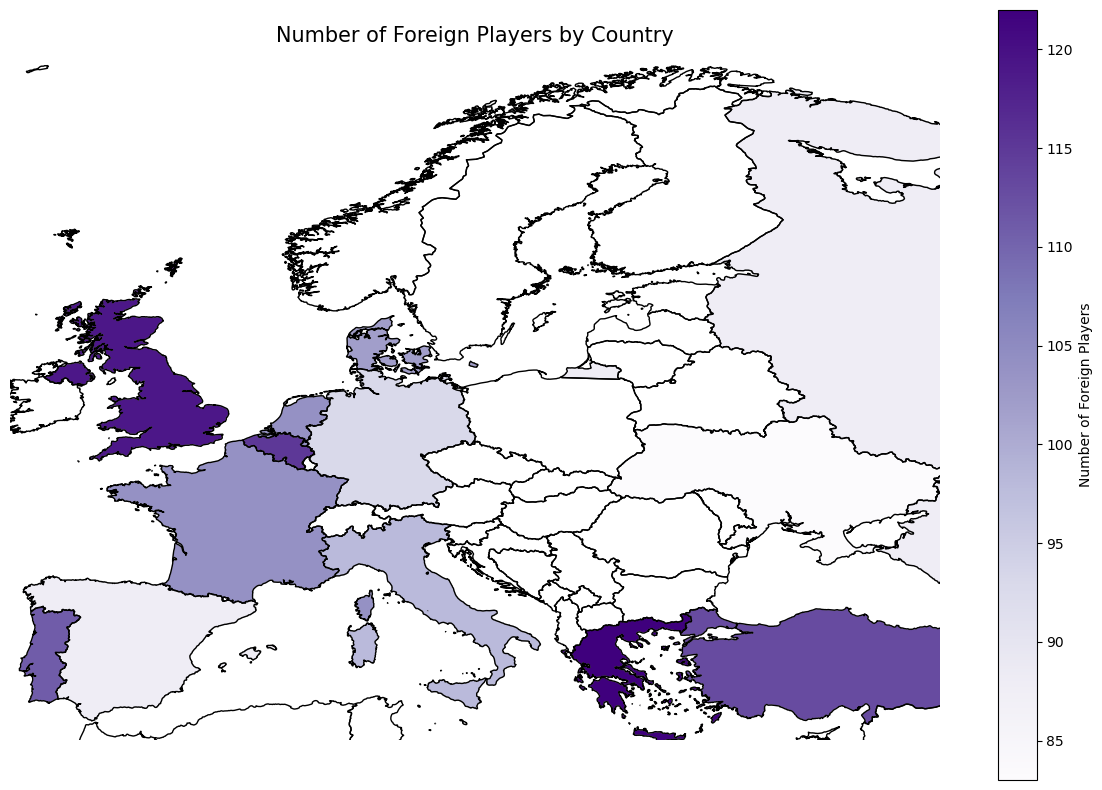

In [120]:
def number_of_foreign_players_by_country(players_df, clubs_df, competition_df, country_shapes):
    name_mapping = {
        'England': 'United Kingdom',
        'Scotland': 'United Kingdom',
        'Wales': 'United Kingdom',
        'Northern Ireland': 'United Kingdom'
    }

    players_df['country_of_citizenship'] = players_df['country_of_citizenship'].str.lower().str.strip()
    clubs_df = clubs_df[['club_id', 'domestic_competition_id']]
    competition_df = competition_df[['competition_id', 'country_name']]

    merged_df = players_df[['player_id', 'country_of_citizenship', 'current_club_id']].merge(clubs_df, left_on='current_club_id', right_on='club_id', how='left')
    merged_df = merged_df.merge(competition_df, left_on='domestic_competition_id', right_on='competition_id', how='left')
    merged_df['country_name'] = merged_df['country_name'].replace(name_mapping)
    
    foreign_counts = merged_df.groupby('country_name')['country_of_citizenship'].nunique().reset_index()

    country_shapes['ADMIN'] = country_shapes['ADMIN'].astype(str).str.lower().str.strip()
    foreign_counts['country_name'] = foreign_counts['country_name'].str.lower().str.strip()
    merged = country_shapes.merge(foreign_counts, left_on='ADMIN', right_on='country_name', how='left')

    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    country_shapes.boundary.plot(ax=ax, linewidth=1, color="black")
    merged.plot(column='country_of_citizenship', cmap='Purples', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)
    
    sm = plt.cm.ScalarMappable(cmap='Purples', norm=plt.Normalize(vmin=merged['country_of_citizenship'].min(), vmax=merged['country_of_citizenship'].max()))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label('Number of Foreign Players')

    ax.set_title('Number of Foreign Players by Country', fontsize=15)
    ax.set_xlim(-10, 40)  
    ax.set_ylim(35, 72)   
    ax.set_axis_off()
    plt.show()
number_of_foreign_players_by_country(players_df, clubs_df, competition_df, country_shapes)


# Average attendance by country

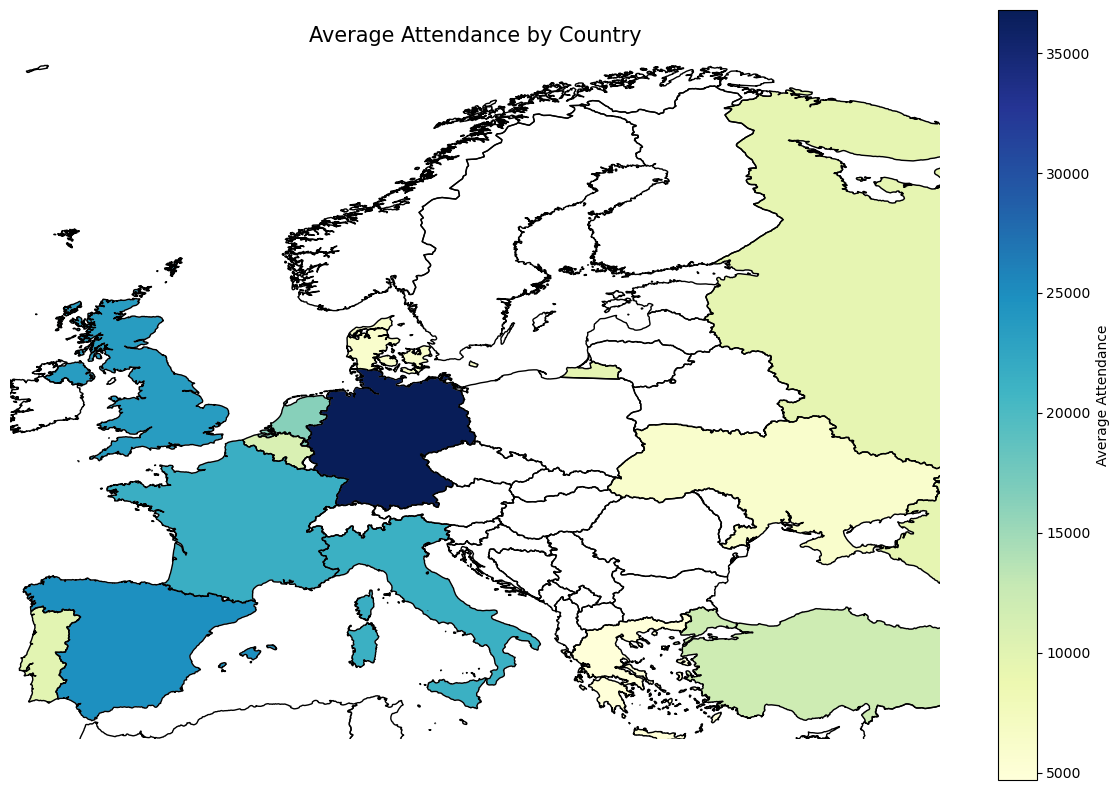

In [122]:
def average_attendance_by_country(games_df, competition_df, country_shapes):
    name_mapping = {
        'England': 'United Kingdom',
        'Scotland': 'United Kingdom',
        'Wales': 'United Kingdom',
        'Northern Ireland': 'United Kingdom'
    }

    games_df = games_df[['game_id', 'attendance', 'competition_id']]
    competition_df = competition_df[['competition_id', 'country_name']]

    merged_df = games_df.merge(competition_df, left_on='competition_id', right_on='competition_id', how='left')
    merged_df['country_name'] = merged_df['country_name'].replace(name_mapping)
    
    avg_attendance = merged_df.groupby('country_name')['attendance'].mean().reset_index()

    country_shapes['ADMIN'] = country_shapes['ADMIN'].astype(str).str.lower().str.strip()
    avg_attendance['country_name'] = avg_attendance['country_name'].str.lower().str.strip()
    merged = country_shapes.merge(avg_attendance, left_on='ADMIN', right_on='country_name', how='left')

    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    country_shapes.boundary.plot(ax=ax, linewidth=1, color="black")
    merged.plot(column='attendance', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)
    
    sm = plt.cm.ScalarMappable(cmap='YlGnBu', norm=plt.Normalize(vmin=merged['attendance'].min(), vmax=merged['attendance'].max()))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, format=plt.FuncFormatter(format_large_numbers))
    cbar.set_label('Average Attendance')

    ax.set_title('Average Attendance by Country', fontsize=15)
    ax.set_xlim(-10, 40)  
    ax.set_ylim(35, 72)   
    ax.set_axis_off()
    plt.show()
average_attendance_by_country(games_df, competition_df, country_shapes)

# Plot player's performance

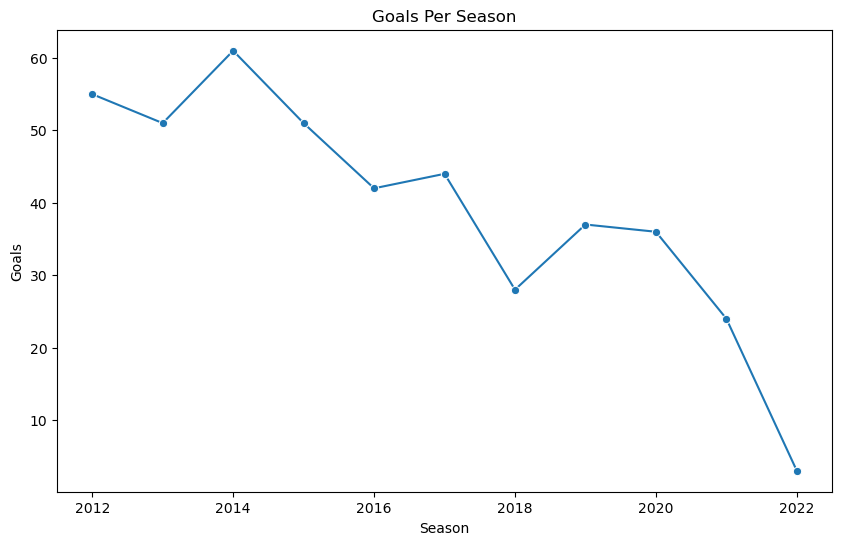

In [153]:
def plot_goals_per_season(player_id=None, competition_id=None):
    merged_df = appearances_df.merge(games_df[['game_id', 'season', 'competition_id']], on='game_id', how='left')

    if player_id:
        merged_df = merged_df[merged_df['player_id'] == player_id]
    if competition_id:
        merged_df = merged_df[merged_df['competition_id'] == competition_id]

    goals_per_season = merged_df.groupby('season')['goals'].sum().reset_index()

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=goals_per_season, x='season', y='goals', marker='o',errorbar='sd')
    plt.title('Goals Per Season')
    plt.xlabel('Season')
    plt.ylabel('Goals')
    plt.show()

plot_goals_per_season(player_id=8198, competition_id=None)


# Player cards analysis


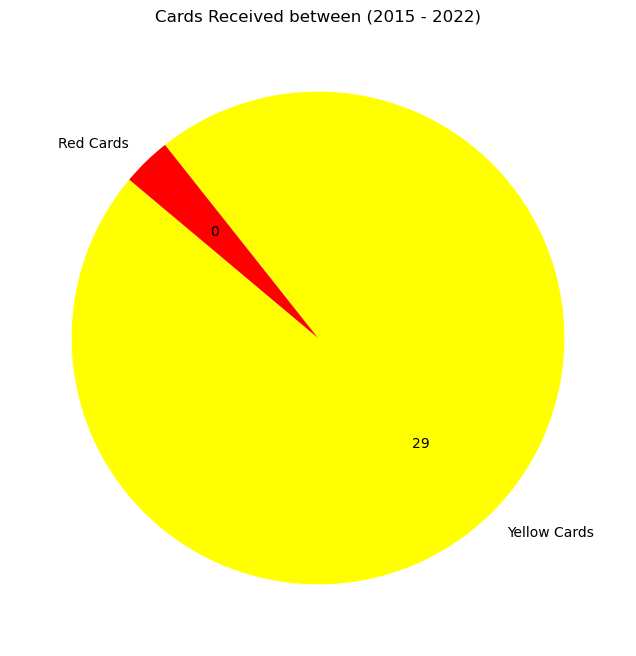

In [162]:

def plot_player_cards_pie_chart(player_id, start_season=None, end_season=None):
    merged_df = appearances_df.merge(games_df[['game_id', 'season']], on='game_id', how='left')

    merged_df['season'] = merged_df['season'].astype(str)
    
    player_df = merged_df[merged_df['player_id'] == player_id]
    if start_season and end_season:
        player_df = player_df[(player_df['season'] >= start_season) & (player_df['season'] <= end_season)]

    total_yellow_cards = player_df['yellow_cards'].sum()
    total_red_cards = player_df['red_cards'].sum()

    labels = ['Yellow Cards', 'Red Cards']
    sizes = [total_yellow_cards, total_red_cards]
    colors = ['yellow', 'red']

    def absolute_value(val):
        a = int(val/100.*sum(sizes))
        return f'{a}'

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, colors=colors, autopct=absolute_value, startangle=140)
    plt.title(f'Cards Received between ({start_season} - {end_season})')
    plt.show()


plot_player_cards_pie_chart(player_id=288230, start_season='2015', end_season='2022')
